# Visualisations

In [1]:
import sys
import time
import re
import matplotlib as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* We load the data from the Data Preparation Notebook.

In [2]:
merged_df = pd.read_csv('full.csv') # the whole data
gap_df = pd.read_csv('gap.csv')     # GAP citations
pac_df = pd.read_csv('pac.csv')     # GAP Packages citations

* We choose plotting style according to preference.

In [91]:
print(plt.style.available) # prints a list of what we have available

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [87]:
plt.style.use('fivethirtyeight')

### Website

<AxesSubplot:title={'center':'Website statistics on the whole data'}, ylabel='Provided?'>

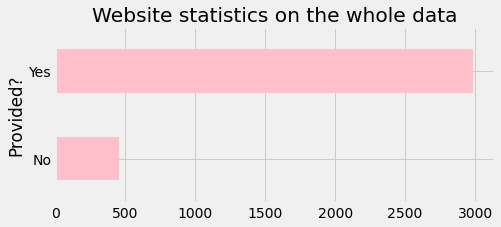

In [88]:
web_chart = merged_df['Website'].value_counts()
web_chart = web_chart.sort_values(ascending=True)
web_chart.plot(kind="barh", figsize=(7, 3), title='Website statistics on the whole data', 
                xlabel='Provided?', ylabel='Count', color='pink')

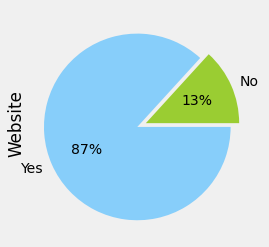

In [89]:
colors = ['yellowgreen', 'lightskyblue']
explode = (0, 0.1)
web_chart.plot(kind="pie", colors=colors, shadow=False, autopct='%1.0f%%', explode=explode)
plt.show()

<AxesSubplot:title={'center':'Website statistics on the Pure GAP data only'}, ylabel='Provided?'>

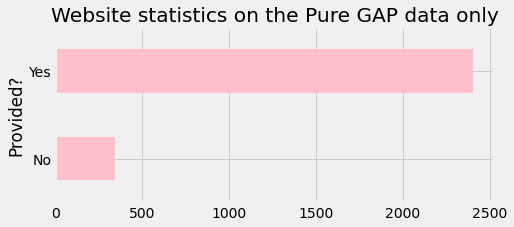

In [90]:
web_gap = gap_df['Website'].value_counts()
web_gap = web_gap.sort_values(ascending=True)
web_gap.plot(kind="barh", figsize=(7, 3), title='Website statistics on the Pure GAP data only', 
                xlabel='Provided?', ylabel='Count', color='pink')

<AxesSubplot:title={'center':'Website statistics on the Package citation data'}, ylabel='Provided?'>

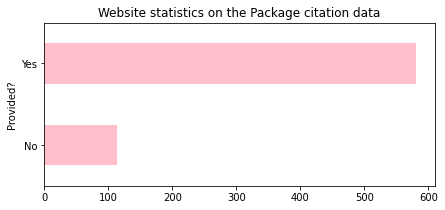

In [6]:
web_pac = pac_df['Website'].value_counts()
web_pac = web_pac.sort_values(ascending=True)
web_pac.plot(kind="barh", figsize=(7, 3), title='Website statistics on the Package citation data', 
                xlabel='Provided?', ylabel='Count', color='pink')

* Website statistics by Year

In [7]:
site_year = merged_df.groupby(['Website', 'Year'])['Year'].count().unstack('Website')
site_year_df = pd.DataFrame(data=site_year)
site_year_df

Website,No,Yes
Year,,
1992,1.0,NaN
1993,2.0,NaN
1994,1.0,NaN
1997,20.0,NaN
1998,14.0,2.0
1999,20.0,1.0
2000,45.0,16.0
2001,44.0,46.0
2002,30.0,37.0


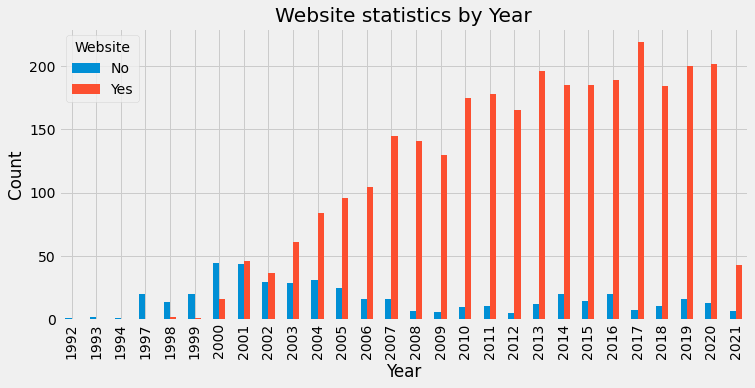

In [92]:
site_year_df.plot(kind="bar", subplots=False, figsize=(11, 5),
                  title='Website statistics by Year', 
                  xlabel='Year', ylabel='Count')
plt.show()

* We can see that in the beginning, up to 2000 the number of citations without a website reference was much higher. Then this trend reverses. On this barchart we can also observe the sharp increase of recorded citations altogether starting from 1997 and reaching a pique in 2017. 

from pandas.plotting import parallel_coordinates

parallel_coordinates(all_years, "Year")

### Lenght
* Most citations are around 110 characters long.

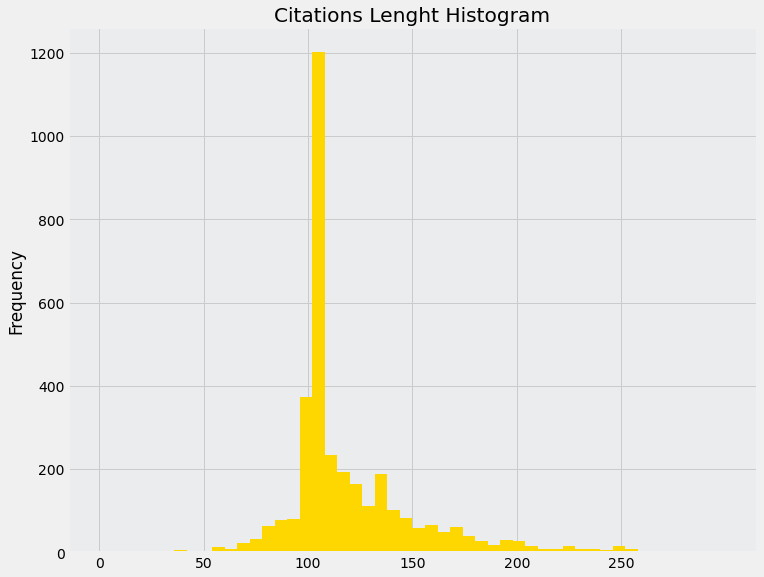

In [93]:
merged_df['Lentght'] = merged_df['Citation'].apply(len)
cit_len = merged_df['Lentght'].plot(kind='hist', bins=50, figsize=(11,9), stacked=True, 
                         xticks = range(0, 300, 50), 
                         range=(0, 300), 
                         color='gold', 
                         title='Citations Lenght Histogram', 
                         xlabel="lenght")
cit_len.set_facecolor('#ebeced')


year_df = merged_df.sort_values(by='Year', ascending=False)
year_df.dropna()
num = year_df['Journal'].count()
year_df.plot(x='Year', y=num, kind='barh')


### Version

<AxesSubplot:title={'center':'Top 35 most cited GAP versions'}, xlabel='Version', ylabel='Count'>

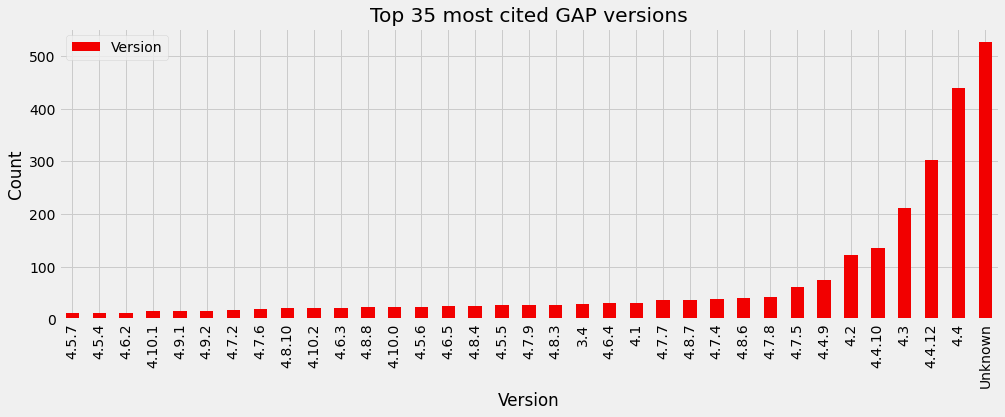

In [94]:
ver = gap_df['Version'].value_counts()
ver = ver.head(35)
ver = ver.to_frame()
ver = ver.sort_values(by='Version', ascending=True) # sort chrono. compare version numbers
ver = ver.dropna()
ver.plot(kind="bar", figsize=(15, 5), title='Top 35 most cited GAP versions', xlabel='Version', 
                ylabel='Count', color='#f20000')

* We can see that the most popular GAP versions cited are subversions of GAP 4, between 4.2 and 4.4

### Authors

* Top 20 authors citing GAP and its packages in their work.

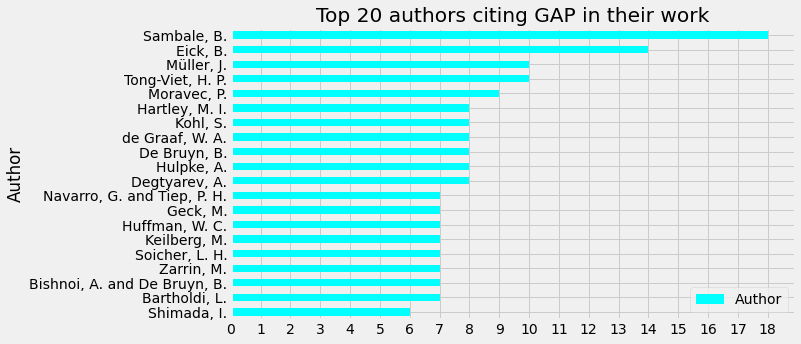

In [95]:
authors = gap_df['Author'].value_counts()
top = authors.head(20)
top = top.sort_values(ascending=True)
top = top.to_frame()
chart = top.plot(kind="barh",
                 figsize=(9,5), title='Top 20 authors citing GAP in their work', 
                 xlabel='Author', 
                 ylabel='Count', color='cyan', 
                  xticks=range(0, 19, 1))
# how do we treat joint papers ?

* Top 20 authors citing GAP Packages

In [12]:
author = pac_df['Author'].value_counts()
top20 = author.head(20)
top20 = top20.sort_values(ascending=False)
top20 = top20.to_frame()
top20

#chart = top20.plot(kind="bar",
#                 figsize=(9,5), title='Top 20 authors citing GAP Packages', 
#                 xlabel='Author', 
#                 ylabel='Count', color='brown', 
#                  xticks=range(0, 19, 1))

,Author
"Bächle, A. and Margolis, L.",10
"Koshitani, S. and Müller, J. and Noeske, F.",10
"Soicher, L. H.",8
"Eick, B.",7
"Kohl, S.",6
"Eick, B. and Horn, M.",6
"Douglas, A. and Repka, J.",6
"de Graaf, W. A.",5
"Assmann, B. and Eick, B.",5
"Fernandes, V. H.",5


* Accuracy + site, ver, year
* Countries + to be provided
* GET function + simplicity is key

### Year

##### Barchart dislaying number of GAP citations per year.

* GAP citation counts for each year, sorted chronologically.

<AxesSubplot:title={'center':'Annual GAP citations data'}, xlabel='Year', ylabel='Count'>

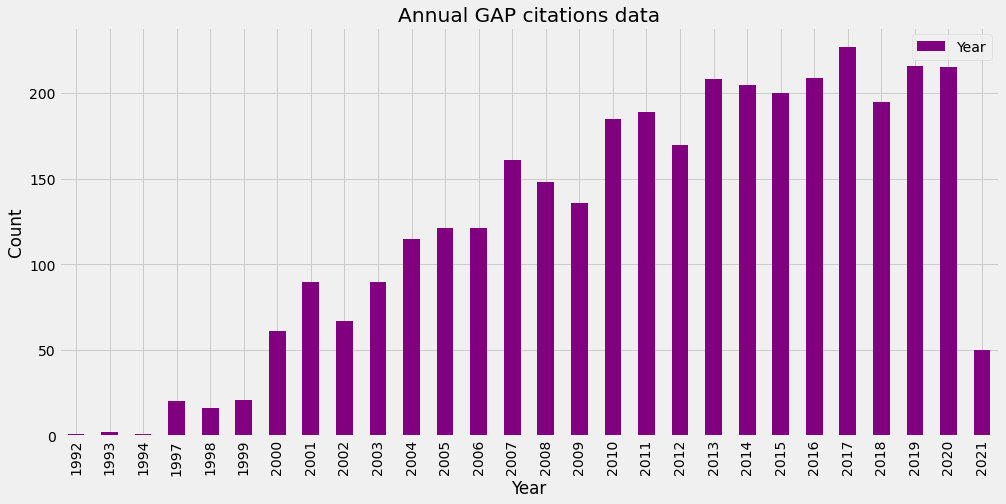

In [96]:
year_chrono = merged_df['Year'].value_counts()
chrono_df = year_chrono.to_frame()
chrono = chrono_df.sort_index()
chrono.plot(kind="bar", figsize=(15, 7), title='Annual GAP citations data', xlabel='Year', 
                ylabel='Count', color='purple')

### Top 20 journals citing GAP.

In [14]:
top_journals = gap_df['Journal'].value_counts()
top_20 = pd.DataFrame(top_journals.head(20))
top_20.reset_index()

,index,Journal
0,J. Algebra,380
1,Comm. Algebra,176
2,J. Symbolic Comput.,96
3,Discrete Math.,87
4,J. Algebra Appl.,85
5,J. Group Theory,69
6,Des. Codes Cryptogr.,59
7,Internat. J. Algebra Comput.,59
8,J. Pure Appl. Algebra,56
9,LMS J. Comput. Math.,46


Only for alternative, useful for copy/paste plain text - quick to load.
Try to allign on the left - journals.

headers = ['Journal name', 'GAP Citations count']
print(tabulate(top_20, headers = headers, tablefmt = 'pretty'))

* Journals by year

In [15]:
jou_year = merged_df.groupby(['Year'])['Journal'].count()
jou_year = pd.DataFrame(data=jou_year)
jou_year.head

<bound method NDFrame.head of       Journal
Year         
1992        1
1993        2
1994        1
1997       20
1998       16
1999       21
2000       61
2001       90
2002       67
2003       90
2004      115
2005      121
2006      121
2007      161
2008      148
2009      136
2010      185
2011      189
2012      170
2013      208
2014      205
2015      200
2016      209
2017      227
2018      195
2019      216
2020      215
2021       50>

### The most frequent type of work citing GAP: we can see that GAP is predominantly cited in articles - 2976 times.

In [16]:
types_pub = pd.DataFrame(merged_df['Publication Type'].value_counts())
types_pub.columns = ['GAP Citations Count']
types_pub.index.names = ['Publication Type']
types_pub

,GAP Citations Count
Publication Type,
article,3393
incollection,43
inproceedings,4


### Accuracy

<AxesSubplot:title={'center':'GAP citations Acuracy data'}, ylabel='Count'>

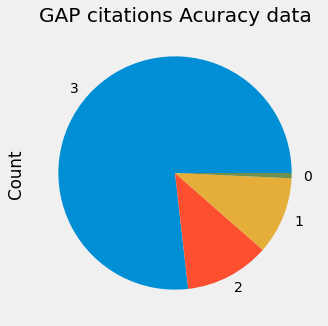

In [97]:
acc = merged_df['Accuracy Score'].value_counts()
acc.plot(kind="pie", figsize=(15, 5), title='GAP citations Acuracy data', xlabel='Score', 
                ylabel='Count')

Trying to get average score per year by dividing the sum of scores to the number of citations for that year

* Annual average of Accuracy sores

<AxesSubplot:title={'center':'Annual average of Accuracy sores'}, xlabel='Year', ylabel='Score'>

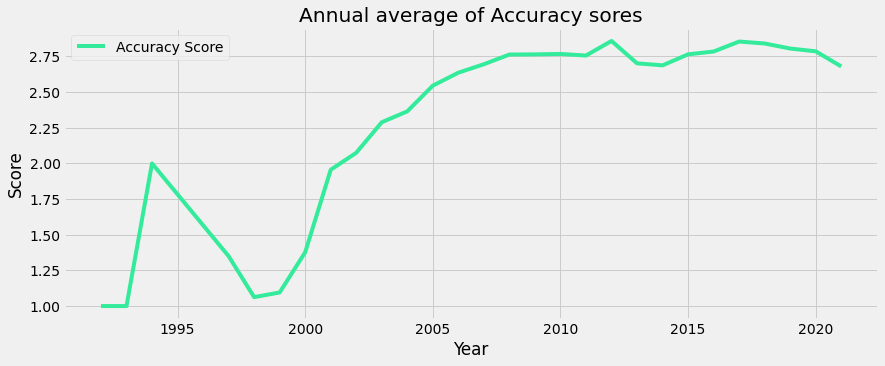

In [98]:
ttt = merged_df.groupby('Year')['Accuracy Score'].mean()
ttt = pd.DataFrame(data=ttt)
ttt.plot(kind='line', figsize=(13, 5), title='Annual average of Accuracy sores', xlabel='Year', 
                ylabel='Score', color='#34eb9b')

<AxesSubplot:xlabel='Accuracy Score'>

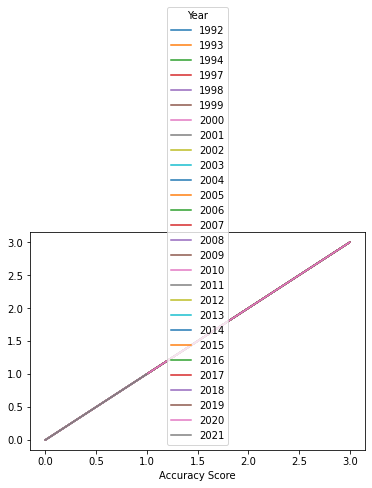

In [19]:
df2 = gap_df.groupby(['Accuracy Score', 'Year'])['Accuracy Score'].mean().unstack('Year')
df2.plot()

### Releases by year

We will use `gap_df` containing only GAP citations with versions provided, all other entries such as Package citations are not needed.

In [20]:
versions_cited = gap_df['Version'].unique()

In [21]:
versions_cited

array(['Unknown', '4.7.5', '4.4.12', '4.7.8', '4.3', '4.4', '4.4.4',
       '4.6.4', '4.7.2', '4.6.5', '4.7.9', '4.8.8', '4.8.9', '4.4.10',
       '4.5.7', '4.7.4', '4.7.7', '4.2', '4.6.12', '4.1', '4.10.0',
       '4.8.6', '4.8.2', '4.10.2', '4.11.0', '4.4.2', '4.8.3', '10.1109',
       '4.8.7', '4.6', '2.12', '4.9.1', '4.4.9', '4.8.4', '4.6.2', '1.2',
       '4.9.3', '4.8.10', '4.5', '4.4.6', '4.4.7', '4.5.5', '1.4',
       '1.3.3', '4.4.11', '5.7', '1.5.4', '4.10.1', '1.0.0',
       '4.4.10.2007', '4.6.3', '1405.5063', '1.1', '3.4', '4.8.5',
       '4.5.6', '4.11', '4.10', '4.9.2', '4.7.6', '4.6.9', '4.5.4',
       '3.4.4', '4.08.10', '0710.3267', '0911.5589', '4.8', '4.9.0',
       '4.7', '3.3', '2.19', '0.97', '10.14760', '1.2.1', '2.2.0',
       '1.5.1', '3.0', '2.0.0', '4.4.2006', '4.5.3', '2.1.0', '3.1.0',
       '3.4.3', '1.0', '55.0810.04', '4.6.1', '4.4.3', '4.8.1', '1.9.6',
       '1804.09707', '3.1', '4.4.5', '1.4.0', '4.46', '4.9', '4.49',
       '10.01.16', '3.2'], dtype

In [24]:
data = gap_df['ReleaseYear'].value_counts()

* Number of Citations by year of cited GAP release, in textual and graphic forms.

In [25]:
data

Unknown    930
2004       449
2008       307
2002       211
2007       135
2000       122
2014       120
2013       112
2015       105
2006        86
2012        84
1999        32
1997        30
2005        13
2016        10
Name: ReleaseYear, dtype: int64

data.loc[sorted(data.index.intersection(range(1997, 20216)))].plot(kind="bar", 
                figsize=(11, 5), title='Citations by year of cited GAP release', xlabel='Years', 
                ylabel='Count', color='green')

In [28]:
years = gap_df['Year'].unique()
dat = gap_df['Year'].value_counts()
g = gap_df['Version'].value_counts()
ver = gap_df['Version'].unique()

In [29]:
gap_df['Publication Type'].value_counts()

article          2703
incollection       39
inproceedings       4
Name: Publication Type, dtype: int64

In [30]:
yea = gap_df.groupby(['Publication Type', 'Year'])['Publication Type'].count().unstack('Publication Type')
yea = pd.DataFrame(data=yea)
yea

Publication Type,article,incollection,inproceedings
Year,,,
1992,1.0,NaN,NaN
1993,2.0,NaN,NaN
1994,1.0,NaN,NaN
1997,20.0,NaN,NaN
1998,15.0,1.0,NaN
1999,19.0,NaN,NaN
2000,46.0,10.0,NaN
2001,65.0,11.0,1.0
2002,46.0,9.0,NaN


<AxesSubplot:title={'center':'Citations by year of cited GAP release'}, xlabel='Years', ylabel='Count'>

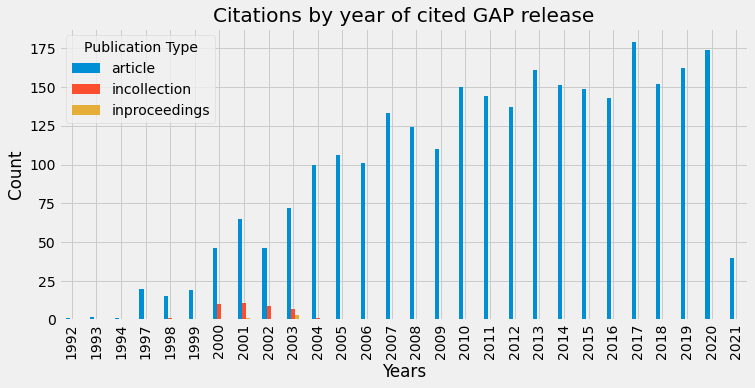

In [100]:
yea.plot(kind="bar", subplots=False,  
                figsize=(11, 5), title='Citations by year of cited GAP release', xlabel='Years', 
                ylabel='Count')

In [32]:
jou = gap_df.groupby('Year')['Journal'].unique()
jou = pd.DataFrame(data=jou)
jou

,Journal
Year,
1992,[Math. Comp.]
1993,[Math. Comp.]
1994,[Math. Comp.]
1997,"[Proc. London Math. Soc. (3), J. Algebra, Tran..."
1998,"[J. Math. Soc. Japan, J. Algebraic Combin., Ma..."
1999,"[Trans. Amer. Math. Soc., J. Algebra, Pacific ..."
2000,"[J. Combin. Des., Internat. J. Algebra Comput...."
2001,"[Houston J. Math., Quaest. Math., Turkish J. M..."
2002,"[Acta Sci. Math. (Szeged), Internat. J. Algebr..."


In [34]:
lee = gap_df.groupby('Lenght')
lee.size()

Lenght
26      1
27      3
31      1
32      1
36      1
       ..
288     2
298     1
327     1
434     1
1076    1
Length: 199, dtype: int64

In [35]:
au7 = gap_df['Author'].unique()
au7

array(['Abas, M. and Vetrík, T.',
       'Abbas, A. and Assi, A. and García-Sánchez, P. A.',
       'Abdolghafourian, A. and Iranmanesh, M. A.', ..., 'Sidki, S. N.',
       'Tian, Y. and Lu, C.', 'Zhurtov, A. K.'], dtype=object)

# Delay in picking up new GAP releases
* Column `delay` = release year - year values. Some `ReleaseYear` cells contain `Unknown` hence we have 1816 entries to work with on this query, which is enought to get a good notion of the trends.

In [42]:
gap_df[gap_df['ReleaseYear'] != 'Unknown'].count()

MR                  1816
Author              1816
Journal             1816
Year                1816
Publication Type    1816
MSC                 1816
Citation            1816
Version             1816
Website             1816
Lenght              1816
Accuracy Score      1816
ReleaseYear         1816
Delay               1816
dtype: int64

Below is the data in graphical form. The longest delays on record are 17 and 18 years but we only have a few such cases. There is one negative values, but it will not affect our visualisation.

In [37]:
tail = gap_df['Delay'].value_counts()
tail = pd.DataFrame(data=tail)
tail = tail.sort_index(ascending=False)
tail

,Delay
18,3
17,2
16,15
15,12
14,20
13,16
12,32
11,30
10,52
9,48


There is one negative value, but it will not affect the general results.

In [38]:
gap_df.loc[gap_df['Delay'] < 0]

,MR,Author,Journal,Year,Publication Type,MSC,Citation,Version,Website,Lenght,Accuracy Score,ReleaseYear,Delay
2050,1958966,"Moore, E. H. and Pollatsek, H.",Des. Codes Cryptogr.,2003,article,05B10 (20D60),"M. Schönert et al., GAP: Groups, Algorithms an...",4.4,No,140,2,2004,-1


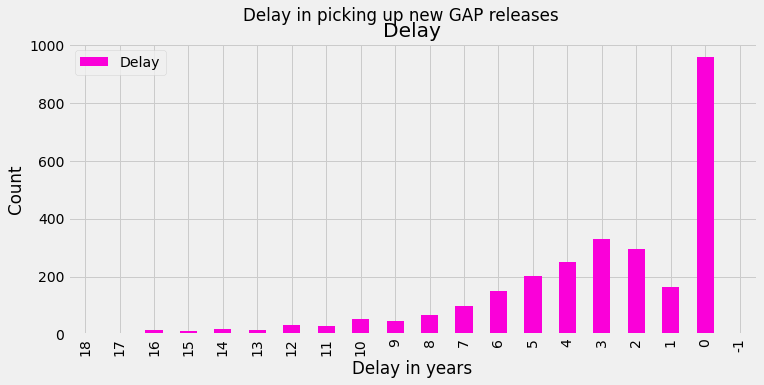

In [101]:
tail.plot(kind="bar", subplots=True,  
                figsize=(11, 5), title='Delay in picking up new GAP releases', xlabel='Delay in years', 
                ylabel='Count', color='#fa00d9')
plt.show()

More than half of the entries have 0 delay which means GAP versions were cited during the same year they were released. Amongst the entries with positive delay those with 1 to 6 years delay are most common with 3 years being the most frequent.

In [61]:
df2.head(3)

Year,1992,1993,1994,1997,1998,1999,2000,2001,2002,2003,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
ReleaseYear,,,,,,,,,,,,,,,,,,,,,
1997,0.0,0.0,0.0,5.0,1.0,2.0,7.0,5.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,6.0,4.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,17.0,27.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='1999'>

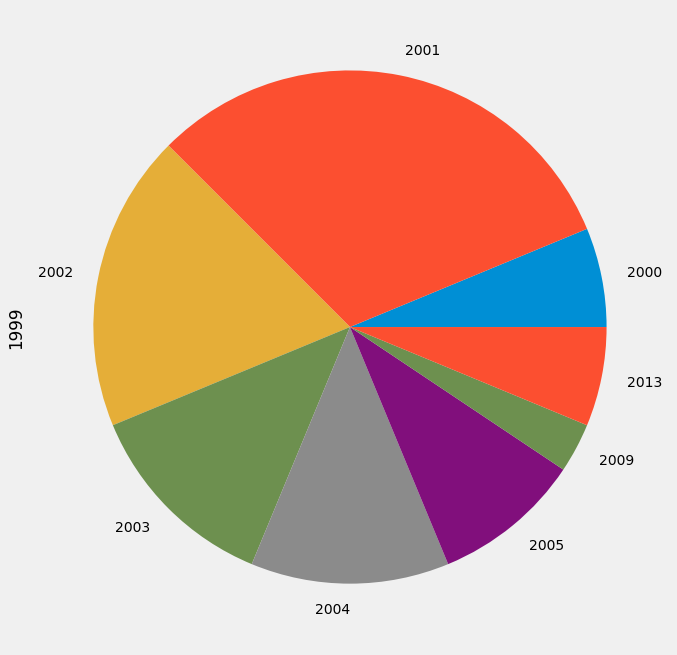

In [102]:
df2 = gap_df.groupby(['Year', 'ReleaseYear'])['ReleaseYear'].count().unstack('Year').fillna(0)

df2.iloc[1].plot.pie(subplots=False, legend=False, figsize=(15, 11))


In [60]:
dff = df2.iloc[3]
dff

Year
1992     0.0
1993     0.0
1994     0.0
1997     0.0
1998     0.0
1999     0.0
2000     0.0
2001     0.0
2002     0.0
2003    17.0
2004    37.0
2005    41.0
2006    23.0
2007    32.0
2008    17.0
2009     6.0
2010     7.0
2011     5.0
2012     7.0
2013     1.0
2014     7.0
2015     2.0
2016     3.0
2017     1.0
2018     0.0
2019     2.0
2020     3.0
2021     0.0
Name: 2002, dtype: float64

#objects = gap_df['Year']

plt.bar(lee, years, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title('Programming language usage')

plt.show()

In [ ]:
gap_df

<AxesSubplot:xlabel='Year'>

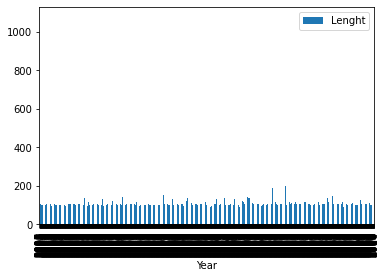

In [41]:
top_medians = gap_df[gap_df["Accuracy Score"] > 2].sort_values("Accuracy Score")
top_medians.plot(x='Year', y='Lenght', kind='bar')

In [ ]:
med = gap_df.groupby(['Lenght'])
#med = med.sort_values(by='Lenght', ascending=False)
med

In [ ]:
plt.plot(top_medians["Year"], top_medians["Lenght"].sum())

# Interactive

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
import cufflinks as cf

* Filter the citations data by year

In [ ]:
years_list = gap_df['Year'].unique()
years_list

In [ ]:
# Interact with specification of arguments
@interact
def show_articles_more_than(Year=years_list, 
                            operator=['Up to', 'For this year', 'After']):
    column='Year'
    if operator == 'For this year':
        return gap_df.loc[gap_df[column] == Year]
    if operator == 'Up to':
        return gap_df.loc[gap_df[column] <= Year]
    if operator == 'After':
        return gap_df.loc[gap_df[column] > Year]

In [ ]:
# Interact with specification of arguments
@interact
def show_articles_more_than(column=['Year', 'Accuracy Score', 'Lenght'], 
                            x=(1, 3000, 1)):
    return gap_df.loc[gap_df[column] == x]

Versions / year
top authors / year
data per year

In [ ]:
def get_info(db, food, nutrient):
    food_info = db
    for word in food.split():
        food_info = food_info[food_info['Food'].str.contains(word, case=False)]
    nutritional_info = food_info[food_info['Nutrient'] == nutrient]
    return nutritional_info

interact(lambda food, nutrient: get_info(db, food, nutrient),
        food='',
        nutrient=list(db['Nutrient'].unique()))

In [ ]:
def get_info(db, author, citation):
    auth_info = db
    for word in author.split():
        auth_info = auth_info[auth_info['Author'].str.contains(word, case=False)]
    cit_info = auth_info[auth_info['Citation'] == citation]
    return cit_info

interact(lambda author, citation: get_info(gap_df, author, citation),
        author = '',
        citation = list(gap_df['Citation'].unique()))

In [ ]:
def get_aut(db, author):
    auth_info = db
    for word in author.split():
        auth_info = auth_info[auth_info['Author'].str.contains(word, case=False)]
    return auth_info


interact(get_aut(merged_df, author), author = '')

In [ ]:
yeaaa = widgets.FloatSlider(min=min(gap_df['Year']), max=max(gap_df['Year']), step=1, description='Year')
display(yea)

In [ ]:
import ipywidgets as widgets
from IPython.display import display




%matplotlib nbagg

x = np.linspace(0, 2, 1000)
fig, ax = plt.subplots(1, figsize=(10, 4))
plt.suptitle('Sine Wave')


def update_plot(amp, phase, freq):
    
    ax.clear()
    y = amp * np.sin(freq * 2 * np.pi * x + phase * 2 * np.pi)
    units = 'amp = {} $(psi)$ \nphase = {} $(s)$ \nfreq = {} $(Hz)$'
    
    ax.plot(x, y, label=units.format(amp, phase, freq))
    ax.set_xlim(x[0], x[-1])
    ax.legend(loc=1)
    ax.set_xlabel('$(s)$')
    plt.show()


amp = widgets.FloatSlider(min=1, max=10, value=1, description='Amp:')
phase = widgets.FloatSlider(min=0, max=5, value=0, description='Phase:')
freq = widgets.FloatSlider(min=1, max=10, value=1, description='Freq:')
    
widgets.interactive(update_plot, amp=amp, phase=phase, freq=freq)

In [ ]:
t=pd.DataFrame({'string':['i live here','you live in eltham','machine learning','learning english','go home','go back','live home'],
                'number':[1,3,2,3,1,2,4],
                'word':['a','haha','runing over there','abcdefg','aaa','bye','hou']})

def myFUN_searchString(value,string):
    s=string.split(' ')
    return value in s

def myFUN_search(value):
    t.loc[:,'Flag']=''
    t.loc[:,'Flag']=[myFUN_searchString(value,x) for x in t.loc[:,'string']]
    return t.loc[:,'Flag']

keyword=widgets.Text(
    value='electricity',
    placeholder='Type something',
    description='keyword:',
    disabled=False
)
display(keyword)


button = widgets.Button(description="search")
display(button)

output = widgets.Output()

@output.capture()
def on_button_clicked(b):
    t.loc[:,'Flag']=myFUN_search(keyword.value)
    t1=t.loc[(t['Flag'])]
    t1.drop(['Flag'],axis=1,inplace=True)
    t1.reset_index(drop=True,inplace=True)
    if t1.shape[0]>30:
        t1=t1.loc[0:30]

    display(t1)

button.on_click(on_button_clicked)
display(output)